In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/data.csv"

In [0]:
df = pd.read_csv(path)

In [6]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 200
Total number of columns in dataset = 4


In [7]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [0]:
target_col = "Target"

In [0]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [0]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using statsmodels 

In [0]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [12]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.88e-69
Time:                        11:56:48   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

"""
#CONCLUSION:
 1) R - Squared and Adjusted R- Squared values are both closer to 1 shows a good explainability of target variable by predictors 
     and shows that they explain the varience very well that is almost 90 percent of it .

2) The values of R Sq. and Adjusted R Sq. are quite close this signifies that we have not taken any non required predictor in the
    predictor feature set.

3) A large F-statistic value and a small Prob (F-statistic) value suggest that there is a significant linear relationship between 
    predictors and target .

4) P>|t| values are small for almost all of the predictors and for three of them its less than 0.05 this signifies that they are
    quite a good predictors for the target value .

"""

In [0]:
X_test = sm.add_constant(X_test)

In [0]:
y_pred = results.predict(X_test)

In [0]:
residual = y_test - y_pred

# No Multicolinearity

In [17]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


All the values of features are less than 5 thus no multicolinearity for the given feature set .
generally if the value of VIF is greater than 10 it suggests heavy multicollinearity and 
if the value of VIF is smaller than 5 it suggests little multicollinearity

# Normailty of Residual

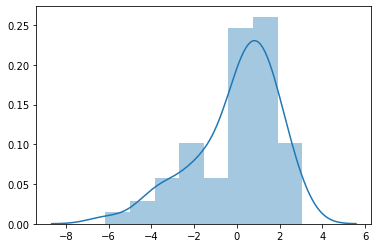

In [18]:
sns.distplot(residual)

The values are almost distributed around 0 so we can consider it as a normal distribution .

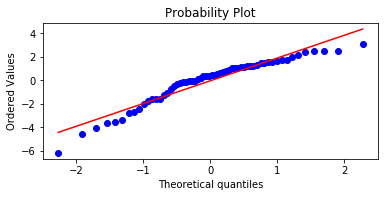

In [19]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [20]:
np.mean(residual)

-0.038488952534398074

Mean of Residuals is around 0 
and also the predicted and theoritical values are very good fit .

# Homoscedasticity

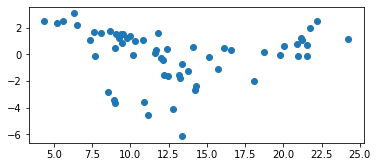

In [21]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

There is no pattern in the residuals and predicted value .

# No autocorrelation of residuals

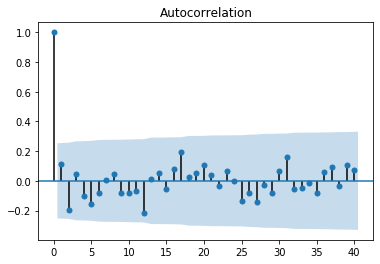

In [22]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

The corelation of residuals never crosses the give threshold boundary .
Thus all the assumptions are verified !